## Naive Bayes

### Importing the required Libraries

In [1]:
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('spam.csv')# load the dataset using pandas

In [3]:
df.head(5) # inspect the top five row of the data set

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape # checks the numbe rof rows and column

(5572, 2)

There are **2** columns and **5572** rows

In [5]:
df.info() # check the dtat type of each column and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Cleaning the Data

In [6]:
df.isnull().sum()  # check the number of missing values

Category    0
Message     0
dtype: int64

In [7]:
df.duplicated().sum() #xhecks for number of duplicated columns

415

In [8]:
duplicated=df[df.duplicated()]
df = df.drop(duplicated.index, axis=0) # drops duplicted rows

<AxesSubplot:xlabel='Category', ylabel='count'>

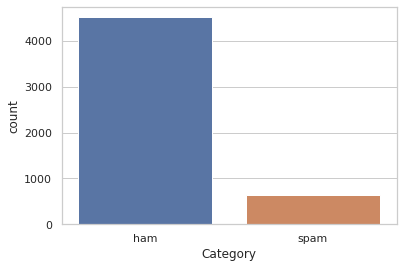

In [9]:
#counts of both ham and spam
sns.countplot(data=df, x='Category')

In [10]:
#converts target column to numerical values
df['Category'] = df['Category'].map({'ham':0, 'spam':1})

### Text Preprocessing

In [11]:
# converts text to lower case
df['Message']=df['Message'].str.lower() # converts to lower case

In [12]:
#import  nltk and download stopwords f
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/suleiman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Stop words** are commonly used words excluded from searches to help index and parse web pages faster. While most Internet search engines and NLP (natural language processing) utilize stop words, they do not prevent users from using them. Instead, the words are only ignored when the search results are displayed.

In [13]:
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['Message'] = df['Message'].apply(lambda x: remove_stopwords(x))

**Lemmatization** is similar to stemming, used to stem the words into root word but differs in working. Actually, Lemmatization is a systematic way to reduce the words into their lemma by matching them with a language dictionary.

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance: 

am, are, is $\Rightarrow$ be

car, cars, car's, cars' $\Rightarrow$ car 

In [14]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['Message'] = df['Message'].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to /home/suleiman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
#Remove Extra Spaces
df['Message'] = df['Message'].apply(lambda x: re.sub(' +', ' ', x))

## Model Fitting

In [16]:
x = df['Message']
#x=x.reshape(-1,1).shape
y= df['Category']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=2)

In [19]:
#converts to numerical
v = CountVectorizer() 
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [21]:
## Model Evaluation

In [22]:
X_test_count = v.transform(X_test)
print('Accuracy  on test set: {:.2f}'.format(model.score(X_test_count, y_test)))

Accuracy  on test set: 0.99


In [23]:
y_pred = model.predict(X_test_count)

### Classification Report

In [24]:
from sklearn.metrics import classification_report

In [26]:
print("Naïve Bayes","\n")
print("Classification Report","\n")
print("*"*70)
print(classification_report(y_test, y_pred))

Naïve Bayes 

Classification Report 

**********************************************************************
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1128
           1       0.97      0.95      0.96       162

    accuracy                           0.99      1290
   macro avg       0.98      0.97      0.98      1290
weighted avg       0.99      0.99      0.99      1290



### Confusion Matrix

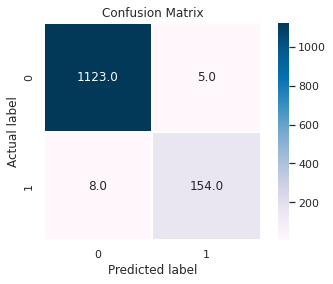

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix',size = 12)
plt.show()
print("\n")

Model predicted 1123 + 154 correctly and  8 + 5 were wrong

### Testing  Email Messages

In [29]:
#Email message
emails = [
    'Hey mohan, can we    get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Don\'t miss this reward!'
]

In [30]:
# preprocssing
processed_email = []
for y in emails:
    x=y.lower()
    x=remove_stopwords(x)
    x=lemmatize_words(x)
    x=re.sub(' +', ' ', x)
    processed_email.append(x)
    

In [31]:
#processed email
processed_email

['hey mohan, get together watch footbal game tomorrow?',
 'upto 20% discount parking, exclusive offer you. miss reward!']

In [32]:
#Bulid a pipeline
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])
clf.fit(X_train, y_train) #trains

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [33]:
emails_count = v.transform(processed_email)
model.predict(emails_count)

array([0, 1])

Model predicted correctly for both messages